In [4]:
import glob
import os

import tifffile
import numpy as np
from matplotlib import pyplot as plt

In [5]:
mmfiles = sorted(glob.glob('../Data/phago/*.mm'))
mmfiles

['../Data/phago/phago_Snail_Phago_R1.mm',
 '../Data/phago/phago_Snail_Phago_R2.mm',
 '../Data/phago/phago_Snail_Phago_R3.mm',
 '../Data/phago/phago_Snail_Phago_R4.mm',
 '../Data/phago/phago_Snail_Phago_R5.mm']

In [6]:
#xtifs = glob.glob("/n/core/cyto/_Data/Rohner/ROP/Imagestream Assay Data/Deep Learning_Feature_Analysis/Snail/Data for Classifier Analysis/phago/*/*.tif")
xdir = "/n/core/cyto/_Data/Rohner/ROP/Imagestream Assay Data/Deep Learning_Feature_Analysis/Snail/Data for Classifier Analysis/phago"
#xreps = os.listdir(xdir)

mdict = {}
for r,d,f in os.walk(xdir):
    f = [a for a in f if a.endswith('.tif')]
    f = [a for a in f if "Ch1." in a]
    _d = {int(a.split("_")[3]): a for a in f}
    if len(_d) > 0:
        mdict[r] = _d



In [7]:
vdict = dict()
for k, v in mdict.items():
    skeys = sorted(v)
    for index, idx in enumerate(skeys):
        vdict[mdict[k][idx]] = index
        


In [8]:
vdict

{'Snail_Phago_R4_0_Ch1.ome.tif': 0,
 'Snail_Phago_R4_4_Ch1.ome.tif': 1,
 'Snail_Phago_R4_5_Ch1.ome.tif': 2,
 'Snail_Phago_R4_6_Ch1.ome.tif': 3,
 'Snail_Phago_R4_7_Ch1.ome.tif': 4,
 'Snail_Phago_R4_8_Ch1.ome.tif': 5,
 'Snail_Phago_R4_9_Ch1.ome.tif': 6,
 'Snail_Phago_R4_11_Ch1.ome.tif': 7,
 'Snail_Phago_R4_12_Ch1.ome.tif': 8,
 'Snail_Phago_R4_14_Ch1.ome.tif': 9,
 'Snail_Phago_R4_15_Ch1.ome.tif': 10,
 'Snail_Phago_R4_16_Ch1.ome.tif': 11,
 'Snail_Phago_R4_18_Ch1.ome.tif': 12,
 'Snail_Phago_R4_19_Ch1.ome.tif': 13,
 'Snail_Phago_R4_22_Ch1.ome.tif': 14,
 'Snail_Phago_R4_25_Ch1.ome.tif': 15,
 'Snail_Phago_R4_26_Ch1.ome.tif': 16,
 'Snail_Phago_R4_27_Ch1.ome.tif': 17,
 'Snail_Phago_R4_28_Ch1.ome.tif': 18,
 'Snail_Phago_R4_31_Ch1.ome.tif': 19,
 'Snail_Phago_R4_32_Ch1.ome.tif': 20,
 'Snail_Phago_R4_35_Ch1.ome.tif': 21,
 'Snail_Phago_R4_36_Ch1.ome.tif': 22,
 'Snail_Phago_R4_37_Ch1.ome.tif': 23,
 'Snail_Phago_R4_38_Ch1.ome.tif': 24,
 'Snail_Phago_R4_39_Ch1.ome.tif': 25,
 'Snail_Phago_R4_40_Ch1.ome.t

In [60]:
mmf = mmfiles[3]
hm = np.memmap(mmf, mode='r', shape=(4,), dtype=np.int32)
mm = np.memmap(mmf, mode='r', shape=tuple(hm), dtype=np.float32)
del hm

In [61]:
mm.shape

(7874, 64, 64, 5)

In [87]:
ivdict = iter(vdict)


TiffTag 266: 0 is not a valid FILLORDER


Snail_Phago_R4_9998_Ch1.ome.tif 7873


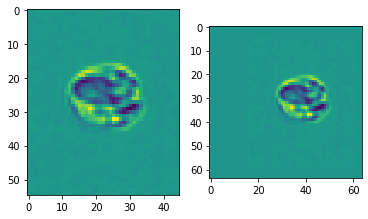

In [112]:
#nxt = next(ivdict)
n = 7873
nxt = list(vdict.keys())[n] #, list(vdict.values())[n]
fnxt = os.path.join(xdir, "_".join(nxt.split("_")[0:3]), nxt)
print(nxt, vdict[nxt])
xs = tifffile.imread(fnxt)
plt.subplot(1,2,1)
plt.imshow(xs)
plt.subplot(1,2,2)
plt.imshow(mm[vdict[nxt], :,:,2])

Wed Sep 16 09:57:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 440.59       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     Off  | 00000000:03:00.0 Off |                  Off |
| 32%   28C    P0    25W / 260W |      0MiB / 48600MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  